In [1]:
from skimage import io
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

## Investigamos el archivo .json

In [ ]:
with open("C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/train_quadrant_enumeration_disease.json") as archivo:
    # Cargar su contenido y crear un diccionario
    xrays = json.load(archivo)

In [ ]:
for i in xrays.items():
    print(i)

print(xrays.items())

In [4]:
keys=[]
for aux in xrays.keys():  # recorremos los valores del principal
    keys.append(aux)
print(keys)

['images', 'annotations', 'categories_1', 'categories_2', 'categories_3']


In [5]:
#Creamos las listas con cada información
info_images=xrays[keys[0]]
print("Número de imágenes:",len(info_images))
print(info_images[0])
print(info_images[1])
annotations=xrays[keys[1]]
print("Número de anotaciones:",len(annotations))
print(annotations[0])
print(annotations[1])
print(annotations[2])
print(annotations[3])
print(annotations[4])
print(annotations[5])
print(annotations[6])
print(annotations[7])
print(annotations[8])
print(annotations[9])
print(annotations[10])
print(annotations[11])
print(annotations[12])

Número de imágenes: 705
{'height': 1316, 'width': 2744, 'id': 1, 'file_name': 'train_673.png'}
{'height': 1504, 'width': 2872, 'id': 2, 'file_name': 'train_283.png'}
Número de anotaciones: 3529
{'iscrowd': 0, 'image_id': 1, 'bbox': [542.0, 698.0, 220.0, 271.0], 'segmentation': [[621, 703, 573, 744, 542, 885, 580, 945, 650, 969, 711, 883, 762, 807, 748, 741, 649, 698]], 'id': 1, 'area': 39683, 'category_id_1': 3, 'category_id_2': 7, 'category_id_3': 0}
{'iscrowd': 0, 'image_id': 1, 'bbox': [1952.0, 693.0, 177.0, 270.0], 'segmentation': [[2045, 693, 2109, 734, 2129, 915, 2047, 963, 2009, 909, 1973, 851, 1955, 782, 1952, 730, 2000, 702]], 'id': 2, 'area': 33301, 'category_id_1': 2, 'category_id_2': 7, 'category_id_3': 0}
{'iscrowd': 0, 'image_id': 1, 'bbox': [675.0, 708.0, 243.0, 300.0], 'segmentation': [[784, 711, 754, 746, 737, 821, 678, 916, 675, 986, 690, 1003, 727, 1008, 787, 998, 851, 925, 885, 857, 918, 807, 916, 763, 882, 720, 827, 708]], 'id': 3, 'area': 45758, 'category_id_1': 3

In [6]:
categories_1=xrays[keys[2]]
print("Número de categorías_1:",len(categories_1))
for i in categories_1:
    print(i)

Número de categorías_1: 4
{'id': 0, 'name': '1', 'supercategory': '1'}
{'id': 1, 'name': '2', 'supercategory': '2'}
{'id': 2, 'name': '3', 'supercategory': '3'}
{'id': 3, 'name': '4', 'supercategory': '4'}


In [7]:
categories_2=xrays[keys[3]]
print("Número de categorías_2:",len(categories_2))
for i in categories_2:
    print(i)

Número de categorías_2: 8
{'id': 0, 'name': '1', 'supercategory': '1'}
{'id': 1, 'name': '2', 'supercategory': '2'}
{'id': 2, 'name': '3', 'supercategory': '3'}
{'id': 3, 'name': '4', 'supercategory': '4'}
{'id': 4, 'name': '5', 'supercategory': '5'}
{'id': 5, 'name': '6', 'supercategory': '6'}
{'id': 6, 'name': '7', 'supercategory': '7'}
{'id': 7, 'name': '8', 'supercategory': '8'}


In [8]:
categories_3=xrays[keys[4]]
print("Número de categorías_3:",len(categories_3))
for i in categories_3:
    print(i)

Número de categorías_3: 4
{'id': 0, 'name': 'Impacted', 'supercategory': 'Impacted'}
{'id': 1, 'name': 'Caries', 'supercategory': 'Caries'}
{'id': 2, 'name': 'Periapical Lesion', 'supercategory': 'Periapical Lesion'}
{'id': 3, 'name': 'Deep Caries', 'supercategory': 'Deep Caries'}


Solo nos interesan las listas de las ímagenes y de las categorías 3, ya que el resto serían útiles para una tarea de segmentación y este proyecto está enfocado en tareas de clasificación

### Investigamos la base de datos

- Dimensiones de la imagen:
(1316, 2750, 3)


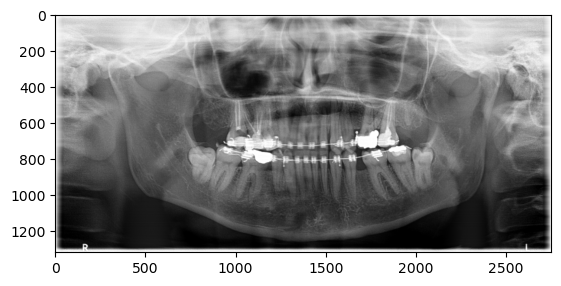

In [9]:
image=cv2.imread('C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/xrays/train_1.png')

print("- Dimensiones de la imagen:")
print(image.shape)
plt.imshow(image,vmin=0,vmax=1)

# 1. Cargamos las imágenes

In [9]:
from PIL import Image


xrays_folder ="C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/xrays"
teeth_folder ="C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/teeth"

teeth=[]
teeth_info=[]
tooth_id=0
con=0
print("leyendo imagenes de ",xrays_folder)

for root, dirnames, filenames in os.walk(xrays_folder):
    for filename in filenames:
        con=con+1
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$",filename):
            filepath = os.path.join(xrays_folder, filename)
            image = io.imread(filepath)
            info_id=0
            for info in info_images:
                if info['file_name']== filename:
                    info_id=info['id']
                    break
            for annotation in annotations:
                if annotation['image_id']==info_id:
                    tooth_id=tooth_id+1
                    bbox=annotation['bbox']
                    bbox_0=int(bbox[0])
                    bbox_1=int(bbox[1])
                    bbox_2=int(bbox[2])
                    bbox_3=int(bbox[3])
                    fila=int(bbox_1+bbox_3)
                    columna=int(bbox_0+bbox_2)
                    tooth=image[bbox_1:fila,bbox_0:columna]
                    teeth.append(tooth)
                    tooth_info={"id":tooth_id,"category":annotation['category_id_3'],"image_id":info_id}
                    #print(tooth_info)
                    teeth_info.append(tooth_info)
                    #GUARDAMOS LOS DIENTES INDIVIDUALMENTE, el nombre de cada imagen será el id
                    tooth_image=Image.fromarray(tooth)
                    new_filepath = os.path.join(teeth_folder, (str(tooth_id)+'.png'))
                    #print(new_filepath)
                    tooth_image.save(new_filepath)
                    
print("Número de imágenes leídas:",con)
print("Número de dientes:",len(teeth_info))

leyendo imagenes de  C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/xrays
Número de imágenes leídas: 705
Número de dientes: 3529


In [31]:
#Redimensionamos las imágenes que todas tengan el mismo tamaño
imgpath_resized="C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/teeth_resized"

for root, dirnames, filenames in os.walk(teeth_folder):
    for filename in filenames:
        filepath = os.path.join(teeth_folder, filename)
        imagen = Image.open(filepath)
        reducida = imagen.resize((224, 224))#en VGG-16 se requieren imágenes de este tamaño
        new_filepath = os.path.join(imgpath_resized, filename)
        reducida.save(new_filepath)

In [10]:
#Leemos de nuevo las imágenes
imgpath_resized="C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/teeth_resized"

images = []
imgcount = 0
cant=0

print("leyendo imagenes de ",imgpath_resized)

for root, dirnames, filenames in os.walk(imgpath_resized):
    while imgcount!=3529:
        for filename in filenames:
            if filename==(str(cant+1)+'.png'):#para comprobar que se estén leyendo por orden de id
                cant=cant+1
                filepath = os.path.join(root, filename)
                image = io.imread(filepath)
                images.append(image)
                b = "Leyendo..." + str(cant)
                print (b, end="\r")
                imgcount=imgcount+1

print("Imagenes en el directorio", imgcount)

leyendo imagenes de  C:/Users/PC/Desktop/TFM/quadrant-enumeration-disease/teeth_resized
Imagenes en el directorio 3529


In [12]:
len(images)

3529

# 2. Crear etiquetas y clases

Como se trata de un problema de clasificación, el único tipo de categoría que nos interesa en la "categories_3". Trabajaremos con esta información.

In [11]:
from scipy import stats
labels=[]
indice=0

for info in teeth_info:
    labels.append(info['category'])


y = np.array(labels)
print(y.shape)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
print(X.shape)

classes = np.unique(y)
nClasses = len(classes)

print("Número de etiquetas:", len(teeth_info))
print("0: Impacted")
print("1: Caries")
print("2: Periapical Lesion")
print("3: Deep Caries")

(3529,)
(3529, 224, 224, 3)
Número de etiquetas: 3529
0: Impacted
1: Caries
2: Periapical Lesion
3: Deep Caries


In [13]:
print(classes)

[0 1 2 3]


In [12]:
impacted=0
caries=0
periapical_lesion=0
deep_caries=0

for tooth in teeth_info:

    if tooth['category'] == 0:
        impacted=impacted+1
    if tooth['category'] == 1:
        caries=caries+1
    if tooth['category'] == 2:
        periapical_lesion=periapical_lesion+1
    if tooth['category'] == 3:
        deep_caries=deep_caries+1
        

print(impacted, " dientes están IMPACTADOS")
print(caries, " dientes tienen CARIES")
print(periapical_lesion, " dientes tienen una LESIÓN APICAL")
print(deep_caries, " dientes tienen CARIES PROFUNDA")

604  dientes están IMPACTADOS
2189  dientes tienen CARIES
158  dientes tienen una LESIÓN APICAL
578  dientes tienen CARIES PROFUNDA


# 3. Utilizamos red preentrenada VGG-16

## Creamos sets de Entrenamiento y Test, Validación y Preprocesar

In [13]:
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [14]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (2823, 224, 224, 3) (2823,)
Testing data shape :  (706, 224, 224, 3) (706,)


In [15]:
#Normalizamos los datos al rango 0-1
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255
#Expandimos dimensiones porque en una CNN tendo que especificar el número de canales
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [16]:
# Cambiamos las etiquetas de catgorical a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print( train_X.shape, train_Y_one_hot.shape, test_X.shape, test_Y_one_hot.shape)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

#train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
#print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(2823, 224, 224, 3, 1) (2823, 4) (706, 224, 224, 3, 1) (706, 4)
Original label: 1
After conversion to one-hot: [0. 1. 0. 0.]


## Cargamos la topología de CNN (base model)

In [31]:
#No se incluye el top model, es la parte densa destinada a la clasificación (fully connected layers)
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3)) 

baseModel_VGG_16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)

In [32]:
#Conectamos el modelo a la nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel_VGG_16.trainable=False #Para evitar que los pesos se modifiquen en la parte convolucional --> TRANSFER LEARNING
pre_trained_model=Sequential()
pre_trained_model.add(baseModel_VGG_16)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(4, activation='softmax'))

pre_trained_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


### Adam + 50 batch_size + 60 epochs

In [20]:
from tensorflow.keras.optimizers import Adam

#con TRANSFER LEARNING la tasa de aprendizaje tiene que ser muy bajita porque los pesos no voy a tener que
#modificarlos mucho. Iré despacito sin dar saltos muy grandes.
pre_trained_model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.0005,decay=0,beta_1=0.9,beta_2=0.999,epsilon=1e-08),metrics=["accuracy"])

In [21]:
Adam_50_batch_60_epochs=pre_trained_model.fit(np.asarray(train_X),np.asarray(train_Y_one_hot),batch_size=50, epochs=60,validation_split=0.2)


Epoch 1/60
46/46 [==============================] - 737s 16s/step - loss: 1.1799 - accuracy: 0.6528 - val_loss: 0.7578 - val_accuracy: 0.7504
Epoch 2/60
46/46 [==============================] - 723s 16s/step - loss: 0.6893 - accuracy: 0.7427 - val_loss: 0.6663 - val_accuracy: 0.7912
Epoch 3/60
46/46 [==============================] - 701s 15s/step - loss: 0.5791 - accuracy: 0.7888 - val_loss: 0.6722 - val_accuracy: 0.7858
Epoch 4/60
46/46 [==============================] - 709s 15s/step - loss: 0.4982 - accuracy: 0.8122 - val_loss: 0.7290 - val_accuracy: 0.6708
Epoch 5/60
46/46 [==============================] - 705s 15s/step - loss: 0.4748 - accuracy: 0.8198 - val_loss: 0.6381 - val_accuracy: 0.7487
Epoch 6/60
46/46 [==============================] - 702s 15s/step - loss: 0.3893 - accuracy: 0.8596 - val_loss: 0.6249 - val_accuracy: 0.7858
Epoch 7/60
46/46 [==============================] - 708s 15s/step - loss: 0.3604 - accuracy: 0.8773 - val_loss: 0.6548 - val_accuracy: 0.7221
Epoch 

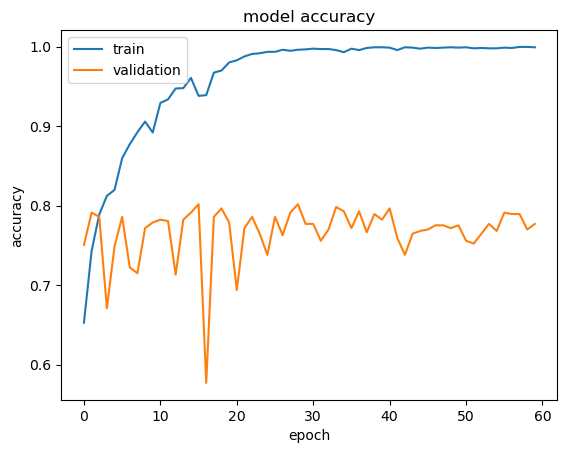

In [22]:
plot_hist(Adam_50_batch_60_epochs)

In [23]:
predictions_Adam_50_batch_60_epochs=pre_trained_model.predict(test_X, batch_size=50)

In [24]:
labelNames=("Impacted","Caries", "Periapical Lesion","Deep Caries")
print(classification_report(test_Y_one_hot.argmax(axis=1),predictions_Adam_50_batch_60_epochs.argmax(axis=1),target_names=labelNames))

                   precision    recall  f1-score   support

         Impacted       0.95      0.74      0.84       140
           Caries       0.78      0.91      0.84       426
Periapical Lesion       0.44      0.12      0.19        33
      Deep Caries       0.42      0.36      0.39       107

         accuracy                           0.76       706
        macro avg       0.65      0.53      0.56       706
     weighted avg       0.75      0.76      0.74       706



In [25]:
pre_trained_model.save('model_TRANSFER_LEARNING_Adam_50_batchsize.h5')

In [28]:
y_probs_TL_ADAM_50 = pre_trained_model.predict_on_batch(test_X)
y_pred_TL_ADAM_50=np.argmax(y_probs_TL_ADAM_50, axis=1)

<Axes: title={'center': 'Matriz de confusión normalizada'}, xlabel='Predicted label', ylabel='True label'>

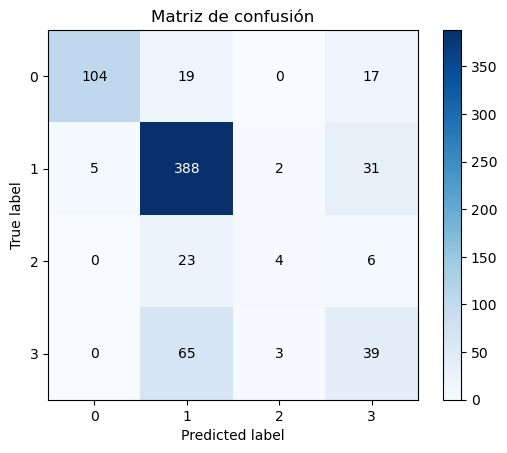

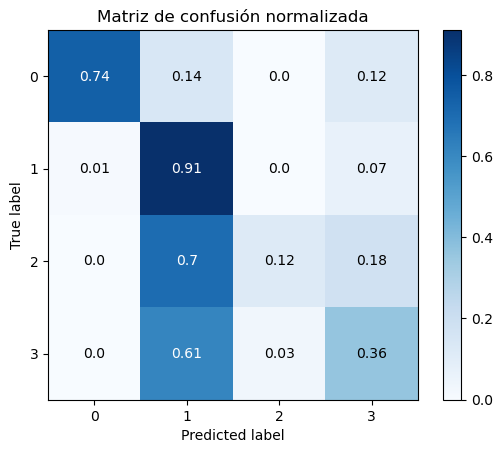

In [29]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

matriz_confusion=confusion_matrix(test_Y,y_pred_TL_ADAM_50)
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_TL_ADAM_50, normalize=False, title= 'Matriz de confusión')
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_TL_ADAM_50, normalize=True, title= 'Matriz de confusión normalizada')

### RMSprop + 50 batch_size + 60 epochs

In [33]:
#con TRANSFER LEARNING la tasa de aprendizaje tiene que ser muy bajita porque los pesos no voy a tener que
#modificarlos mucho. Iré despacito sin dar saltos muy grandes.
pre_trained_model.compile(loss="categorical_crossentropy",optimizer='RMSprop',metrics=["accuracy"])

In [34]:
RMSprop_50_batch_60_epochs=pre_trained_model.fit(np.asarray(train_X),np.asarray(train_Y_one_hot),batch_size=50, epochs=60,validation_split=0.2)

Epoch 1/60
46/46 [==============================] - 690s 15s/step - loss: 2.3334 - accuracy: 0.5691 - val_loss: 0.7950 - val_accuracy: 0.7434
Epoch 2/60
46/46 [==============================] - 692s 15s/step - loss: 1.0201 - accuracy: 0.6258 - val_loss: 0.7204 - val_accuracy: 0.7717
Epoch 3/60
46/46 [==============================] - 692s 15s/step - loss: 0.8869 - accuracy: 0.6873 - val_loss: 0.6998 - val_accuracy: 0.7558
Epoch 4/60
46/46 [==============================] - 692s 15s/step - loss: 0.7265 - accuracy: 0.7205 - val_loss: 0.7338 - val_accuracy: 0.7646
Epoch 5/60
46/46 [==============================] - 690s 15s/step - loss: 0.6245 - accuracy: 0.7564 - val_loss: 1.1184 - val_accuracy: 0.5717
Epoch 6/60
46/46 [==============================] - 690s 15s/step - loss: 0.6458 - accuracy: 0.7502 - val_loss: 0.9461 - val_accuracy: 0.6991
Epoch 7/60
46/46 [==============================] - 690s 15s/step - loss: 0.5704 - accuracy: 0.7728 - val_loss: 0.6325 - val_accuracy: 0.7717
Epoch 

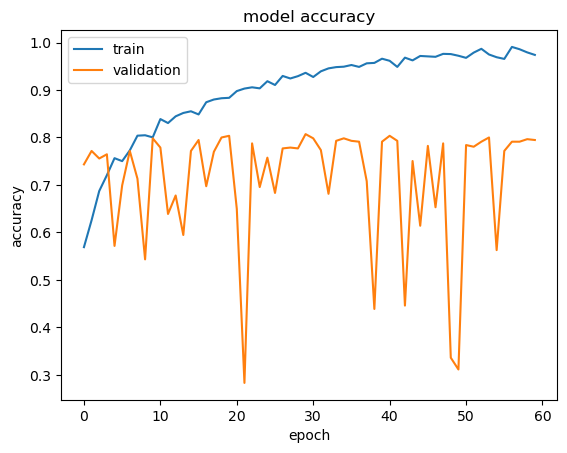

In [35]:
plot_hist(RMSprop_50_batch_60_epochs)

In [36]:
predictions_RMSprop_TL_50=pre_trained_model.predict(test_X, batch_size=50)

In [37]:
print(classification_report(test_Y_one_hot.argmax(axis=1),predictions_RMSprop_TL_50.argmax(axis=1),target_names=labelNames))

                   precision    recall  f1-score   support

         Impacted       0.90      0.92      0.91       140
           Caries       0.80      0.94      0.87       426
Periapical Lesion       0.50      0.27      0.35        33
      Deep Caries       0.55      0.22      0.32       107

         accuracy                           0.80       706
        macro avg       0.69      0.59      0.61       706
     weighted avg       0.77      0.80      0.77       706



In [38]:
pre_trained_model.save('model_TRANSFER_LEARNING_RMSprop_50_batchsize.h5')

In [39]:
y_probs_TL_RMSprop_50 = pre_trained_model.predict_on_batch(test_X)
y_pred_TL_RMSprop_50=np.argmax(y_probs_TL_RMSprop_50, axis=1)

<Axes: title={'center': 'Matriz de confusión normalizada'}, xlabel='Predicted label', ylabel='True label'>

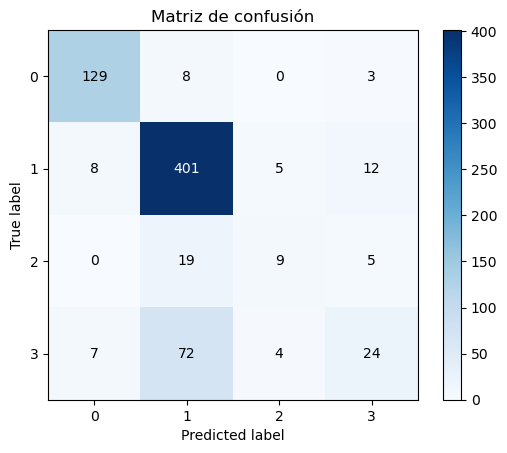

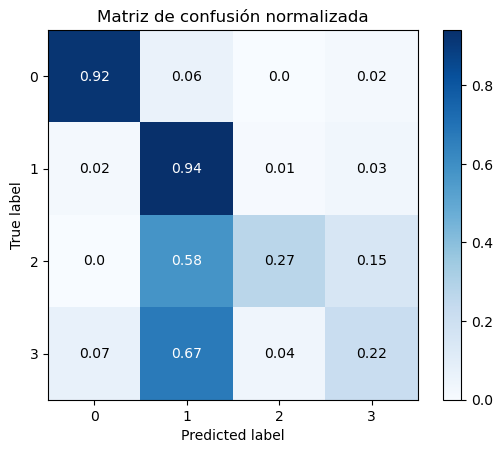

In [40]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

matriz_confusion=confusion_matrix(test_Y,y_pred_TL_RMSprop_50)
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_TL_RMSprop_50, normalize=False, title= 'Matriz de confusión')
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_TL_RMSprop_50, normalize=True, title= 'Matriz de confusión normalizada')

### SDG + 50 batch_size + 60 epochs

In [80]:
#No se incluye el top model, es la parte densa destinada a la clasificación (fully connected layers)
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3)) 

baseModel_VGG_16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [81]:
#Conectamos el modelo a la nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel_VGG_16.trainable=False #Para evitar que los pesos se modifiquen en la parte convolucional --> TRANSFER LEARNING
pre_trained_model=Sequential()
pre_trained_model.add(baseModel_VGG_16)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(4, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [83]:
pre_trained_model.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=["accuracy"])

In [84]:
# Entrenamos el modelo
SGD_TL_50_batchsize_60_epochs = pre_trained_model.fit(train_X, train_Y_one_hot, validation_split=0.2, batch_size=50, epochs=60)

Epoch 1/60
46/46 [==============================] - 643s 14s/step - loss: 1.2894 - accuracy: 0.5837 - val_loss: 0.9975 - val_accuracy: 0.6478
Epoch 2/60
46/46 [==============================] - 645s 14s/step - loss: 1.0152 - accuracy: 0.6187 - val_loss: 1.0500 - val_accuracy: 0.6496
Epoch 3/60
46/46 [==============================] - 648s 14s/step - loss: 0.9764 - accuracy: 0.6244 - val_loss: 1.0426 - val_accuracy: 0.6478
Epoch 4/60
46/46 [==============================] - 650s 14s/step - loss: 0.9579 - accuracy: 0.6337 - val_loss: 0.9013 - val_accuracy: 0.7451
Epoch 5/60
46/46 [==============================] - 655s 14s/step - loss: 0.9251 - accuracy: 0.6457 - val_loss: 0.9654 - val_accuracy: 0.7168
Epoch 6/60
46/46 [==============================] - 655s 14s/step - loss: 0.9198 - accuracy: 0.6523 - val_loss: 1.2593 - val_accuracy: 0.3292
Epoch 7/60
46/46 [==============================] - 656s 14s/step - loss: 0.8856 - accuracy: 0.6572 - val_loss: 0.9542 - val_accuracy: 0.6513
Epoch 

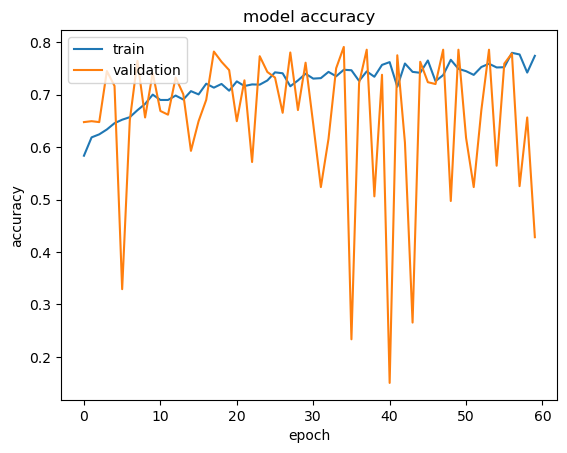

In [85]:
plot_hist(SGD_TL_50_batchsize_60_epochs)

In [86]:
predictions_SGD_TL_50_batchsize_60_epochs=pre_trained_model.predict(test_X, batch_size=50)

In [87]:
labelNames=("Impacted","Caries", "Periapical Lesion","Deep Caries")
print(classification_report(test_Y_one_hot.argmax(axis=1),predictions_SGD_TL_50_batchsize_60_epochs.argmax(axis=1),target_names=labelNames))

                   precision    recall  f1-score   support

         Impacted       0.53      0.99      0.69       140
           Caries       0.83      0.29      0.43       426
Periapical Lesion       0.50      0.12      0.20        33
      Deep Caries       0.19      0.50      0.27       107

         accuracy                           0.45       706
        macro avg       0.51      0.48      0.40       706
     weighted avg       0.66      0.45      0.45       706



In [88]:
pre_trained_model.save('model_TRANSFER_LEARNING_SGD_50_batchsize.h5')

In [89]:
y_probs_TL_SGD_50 = pre_trained_model.predict_on_batch(test_X)
y_pred_TL_SGD_50=np.argmax(y_probs_TL_SGD_50, axis=1)

<Axes: title={'center': 'Matriz de confusión normalizada'}, xlabel='Predicted label', ylabel='True label'>

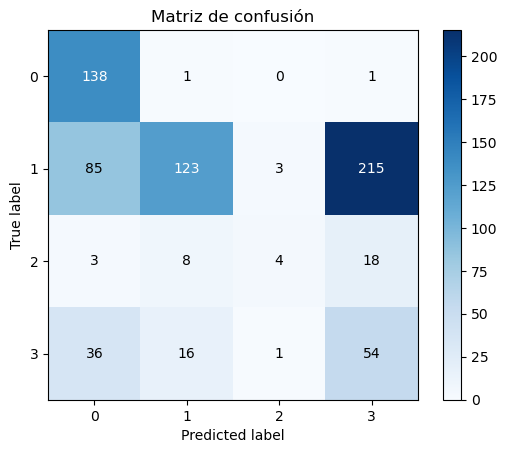

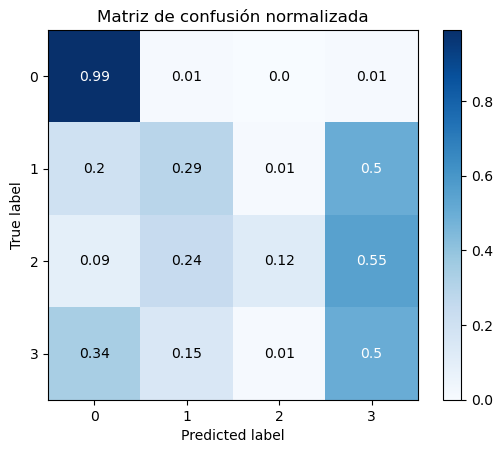

In [90]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

matriz_confusion=confusion_matrix(test_Y,y_pred_TL_SGD_50)
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_TL_SGD_50, normalize=False, title= 'Matriz de confusión')
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_TL_SGD_50, normalize=True, title= 'Matriz de confusión normalizada')

## Creando el top model y descongelando bloques convolucionales (FINE TUNING)

In [41]:
# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in baseModel_VGG_16.layers:
    if layer.name == 'block3_conv1':
        break
    layer.trainable = False #Por defecto todas las capas están a True, esos ignifica que todas están puestas a ser entrenadas. Pero yo lo que quiero es mirar cuáles no quierro entrenar y dejar congeladas.
    print('Capa ' + layer.name + ' congelada...')

Capa input_2 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...


In [42]:
# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = baseModel_VGG_16.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)
model_fine_tuning = Model(baseModel_VGG_16.input, x)

In [43]:
# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
# Podemos observar que en las capas congeladas no hay ningún parámetros que se vaya a entrenar
model_fine_tuning.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### RMSprop + 50 batch_size + 60 epochs

In [44]:
model_fine_tuning.compile(loss="categorical_crossentropy",optimizer='RMSprop',metrics=["accuracy"])

In [45]:
# Entrenamos el modelo
RMSprop_50_batchsize_60_epochs = model_fine_tuning.fit(train_X, train_Y_one_hot, validation_split=0.2, batch_size=50, epochs=60, verbose=1)

Epoch 1/60
46/46 [==============================] - 711s 15s/step - loss: 3.3133 - accuracy: 0.5306 - val_loss: 0.8595 - val_accuracy: 0.7434
Epoch 2/60
46/46 [==============================] - 713s 15s/step - loss: 0.9877 - accuracy: 0.6351 - val_loss: 1.6617 - val_accuracy: 0.1487
Epoch 3/60
46/46 [==============================] - 711s 15s/step - loss: 0.8970 - accuracy: 0.6754 - val_loss: 1.0804 - val_accuracy: 0.6018
Epoch 4/60
46/46 [==============================] - 713s 15s/step - loss: 0.8067 - accuracy: 0.7059 - val_loss: 0.7575 - val_accuracy: 0.7664
Epoch 5/60
46/46 [==============================] - 717s 16s/step - loss: 0.7297 - accuracy: 0.7281 - val_loss: 0.9065 - val_accuracy: 0.7133
Epoch 6/60
46/46 [==============================] - 714s 16s/step - loss: 0.7085 - accuracy: 0.7276 - val_loss: 1.0757 - val_accuracy: 0.5381
Epoch 7/60
46/46 [==============================] - 711s 15s/step - loss: 0.6626 - accuracy: 0.7542 - val_loss: 0.9129 - val_accuracy: 0.7097
Epoch 

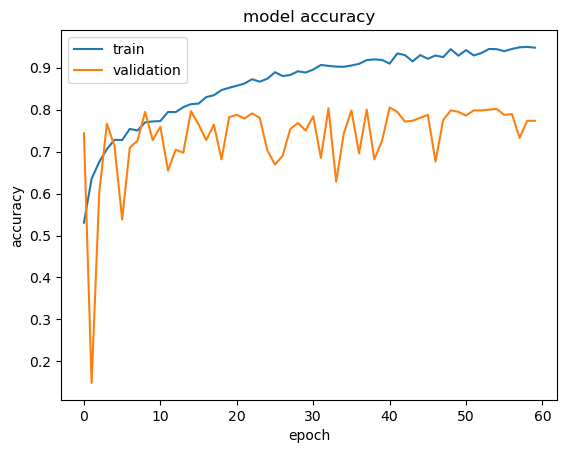

In [46]:
plot_hist(RMSprop_50_batchsize_60_epochs)

In [47]:
predictions_RMSprop_FT_50_batchsize_60_epochs=model_fine_tuning.predict(test_X, batch_size=50)

In [48]:
labelNames=("Impacted","Caries", "Periapical Lesion","Deep Caries")
print(classification_report(test_Y_one_hot.argmax(axis=1),predictions_RMSprop_FT_50_batchsize_60_epochs.argmax(axis=1),target_names=labelNames))

                   precision    recall  f1-score   support

         Impacted       0.93      0.89      0.91       140
           Caries       0.79      0.94      0.86       426
Periapical Lesion       0.35      0.36      0.36        33
      Deep Caries       0.61      0.18      0.28       107

         accuracy                           0.79       706
        macro avg       0.67      0.59      0.60       706
     weighted avg       0.77      0.79      0.76       706



In [49]:
model_fine_tuning.save('model_FINE_TUNING_RMSprop_50_batchsize.h5')

In [50]:
y_probs_FT_RMSprop_50 = model_fine_tuning.predict_on_batch(test_X)
y_pred_FT_RMSprop_50=np.argmax(y_probs_FT_RMSprop_50, axis=1)

<Axes: title={'center': 'Matriz de confusión normalizada'}, xlabel='Predicted label', ylabel='True label'>

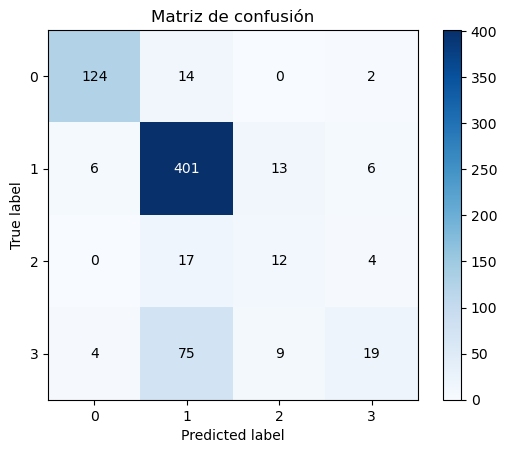

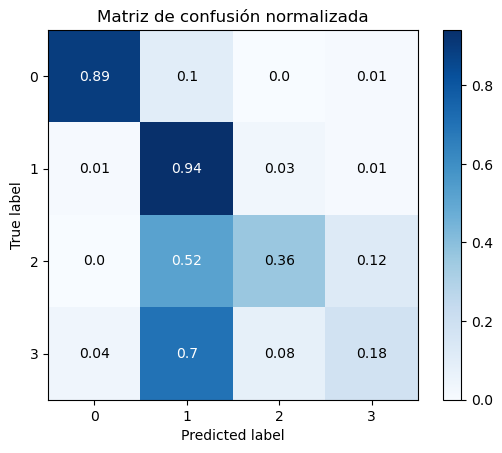

In [51]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

matriz_confusion=confusion_matrix(test_Y,y_pred_FT_RMSprop_50)
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_FT_RMSprop_50, normalize=False, title= 'Matriz de confusión')
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_FT_RMSprop_50, normalize=True, title= 'Matriz de confusión normalizada')

### ADAM + 50 batch_size + 60 epochs

In [52]:
#No se incluye el top model, es la parte densa destinada a la clasificación (fully connected layers)
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3)) 

baseModel_VGG_16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [53]:
# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in baseModel_VGG_16.layers:
    if layer.name == 'block3_conv1':
        break
    layer.trainable = False #Por defecto todas las capas están a True, esos ignifica que todas están puestas a ser entrenadas. Pero yo lo que quiero es mirar cuáles no quierro entrenar y dejar congeladas.
    print('Capa ' + layer.name + ' congelada...')

Capa input_3 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...


In [54]:
# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = baseModel_VGG_16.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)
model_fine_tuning = Model(baseModel_VGG_16.input, x)

In [55]:
# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
# Podemos observar que en las capas congeladas no hay ningún parámetros que se vaya a entrenar
model_fine_tuning.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

______________________________________________________________

In [56]:
model_fine_tuning.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.0005,decay=0,beta_1=0.9,beta_2=0.999,epsilon=1e-08),metrics=["accuracy"])

In [57]:
# Entrenamos el modelo
Adam_FT_50_batchsize_60_epochs = model_fine_tuning.fit(train_X, train_Y_one_hot, validation_split=0.2, batch_size=50, epochs=60, verbose=1)

Epoch 1/60
46/46 [==============================] - 1518s 33s/step - loss: 1.2552 - accuracy: 0.5864 - val_loss: 1.0307 - val_accuracy: 0.6478
Epoch 2/60
46/46 [==============================] - 1521s 33s/step - loss: 1.0581 - accuracy: 0.6187 - val_loss: 1.0004 - val_accuracy: 0.6478
Epoch 3/60
46/46 [==============================] - 1519s 33s/step - loss: 0.9977 - accuracy: 0.6342 - val_loss: 1.0525 - val_accuracy: 0.6230
Epoch 4/60
46/46 [==============================] - 1545s 34s/step - loss: 0.9232 - accuracy: 0.6723 - val_loss: 0.8224 - val_accuracy: 0.7204
Epoch 5/60
46/46 [==============================] - 1526s 33s/step - loss: 0.8437 - accuracy: 0.6922 - val_loss: 0.8186 - val_accuracy: 0.7204
Epoch 6/60
46/46 [==============================] - 1529s 33s/step - loss: 0.7992 - accuracy: 0.7042 - val_loss: 0.7328 - val_accuracy: 0.7611
Epoch 7/60
46/46 [==============================] - 1529s 33s/step - loss: 0.7323 - accuracy: 0.7316 - val_loss: 0.6901 - val_accuracy: 0.7788

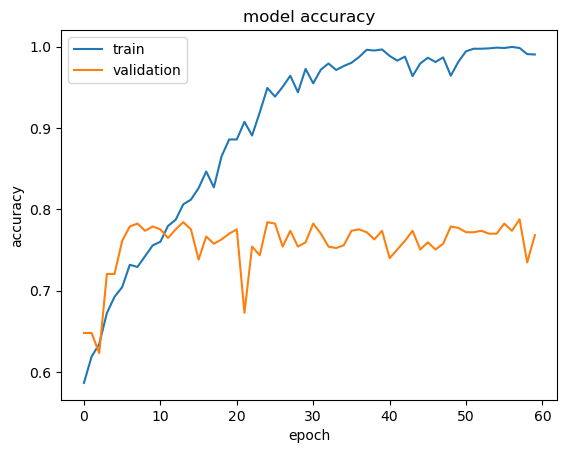

In [58]:
plot_hist(Adam_FT_50_batchsize_60_epochs)

In [59]:
predictions_Adam_FT_50_batchsize_60_epochs=model_fine_tuning.predict(test_X, batch_size=50)

In [60]:
labelNames=("Impacted","Caries", "Periapical Lesion","Deep Caries")
print(classification_report(test_Y_one_hot.argmax(axis=1),predictions_Adam_FT_50_batchsize_60_epochs.argmax(axis=1),target_names=labelNames))

                   precision    recall  f1-score   support

         Impacted       0.86      0.86      0.86       140
           Caries       0.81      0.90      0.85       426
Periapical Lesion       0.42      0.15      0.22        33
      Deep Caries       0.48      0.35      0.40       107

         accuracy                           0.77       706
        macro avg       0.64      0.57      0.58       706
     weighted avg       0.75      0.77      0.76       706



In [61]:
model_fine_tuning.save('model_FINE_TUNING_Adam_50_batchsize.h5')

In [62]:
y_probs_FT_Adam_50 = model_fine_tuning.predict_on_batch(test_X)
y_pred_FT_Adam_50=np.argmax(y_probs_FT_Adam_50, axis=1)

<Axes: title={'center': 'Matriz de confusión normalizada'}, xlabel='Predicted label', ylabel='True label'>

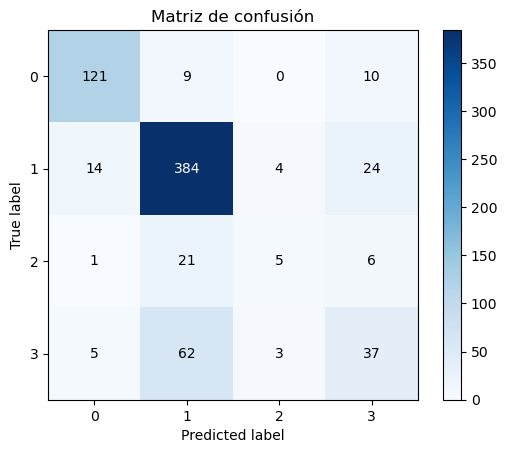

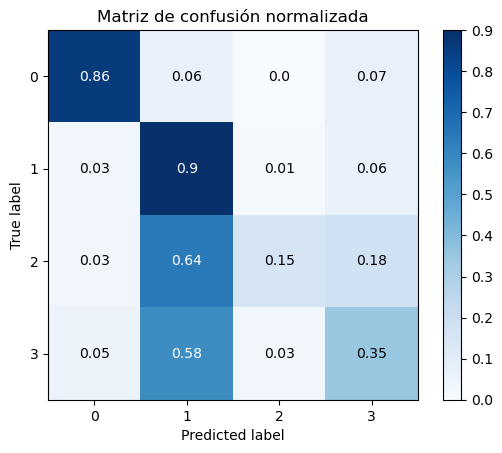

In [63]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

matriz_confusion=confusion_matrix(test_Y,y_pred_FT_Adam_50)
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_FT_Adam_50, normalize=False, title= 'Matriz de confusión')
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_FT_Adam_50, normalize=True, title= 'Matriz de confusión normalizada')

### SDG + 50 batch_size + 60 epochs

In [64]:
#No se incluye el top model, es la parte densa destinada a la clasificación (fully connected layers)
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3)) 

baseModel_VGG_16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [65]:
# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in baseModel_VGG_16.layers:
    if layer.name == 'block3_conv1':
        break
    layer.trainable = False #Por defecto todas las capas están a True, esos ignifica que todas están puestas a ser entrenadas. Pero yo lo que quiero es mirar cuáles no quierro entrenar y dejar congeladas.
    print('Capa ' + layer.name + ' congelada...')

Capa input_4 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...


In [66]:
# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = baseModel_VGG_16.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)
model_fine_tuning = Model(baseModel_VGG_16.input, x)

In [67]:
# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
# Podemos observar que en las capas congeladas no hay ningún parámetros que se vaya a entrenar
model_fine_tuning.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

_________________________________________________________________________

In [72]:

model_fine_tuning.compile(loss="categorical_crossentropy",optimizer='sgd',metrics=["accuracy"])

In [73]:
# Entrenamos el modelo
SGD_FT_50_batchsize_60_epochs = model_fine_tuning.fit(train_X, train_Y_one_hot, validation_split=0.2, batch_size=50, epochs=60, verbose=1)

Epoch 1/60
46/46 [==============================] - 1504s 33s/step - loss: 1.0944 - accuracy: 0.6032 - val_loss: 0.9820 - val_accuracy: 0.6478
Epoch 2/60
46/46 [==============================] - 1518s 33s/step - loss: 0.9646 - accuracy: 0.6315 - val_loss: 1.0225 - val_accuracy: 0.6478
Epoch 3/60
46/46 [==============================] - 1524s 33s/step - loss: 0.8925 - accuracy: 0.6749 - val_loss: 0.8779 - val_accuracy: 0.7133
Epoch 4/60
46/46 [==============================] - 1522s 33s/step - loss: 0.8254 - accuracy: 0.6882 - val_loss: 0.8899 - val_accuracy: 0.6566
Epoch 5/60
46/46 [==============================] - 1521s 33s/step - loss: 0.7008 - accuracy: 0.7440 - val_loss: 0.6609 - val_accuracy: 0.7805
Epoch 6/60
46/46 [==============================] - 1523s 33s/step - loss: 0.6458 - accuracy: 0.7573 - val_loss: 1.8224 - val_accuracy: 0.4212
Epoch 7/60
46/46 [==============================] - 1519s 33s/step - loss: 0.6940 - accuracy: 0.7387 - val_loss: 0.6743 - val_accuracy: 0.7628

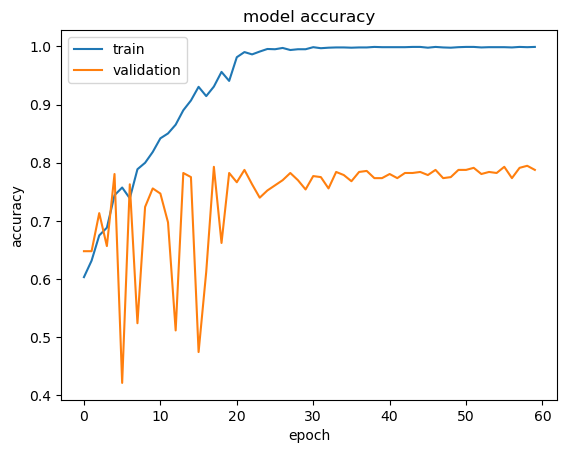

In [74]:
plot_hist(SGD_FT_50_batchsize_60_epochs)

In [75]:
predictions_SGD_FT_50_batchsize_60_epochs=model_fine_tuning.predict(test_X, batch_size=50)

In [76]:
labelNames=("Impacted","Caries", "Periapical Lesion","Deep Caries")
print(classification_report(test_Y_one_hot.argmax(axis=1),predictions_SGD_FT_50_batchsize_60_epochs.argmax(axis=1),target_names=labelNames))

                   precision    recall  f1-score   support

         Impacted       0.93      0.91      0.92       140
           Caries       0.81      0.93      0.87       426
Periapical Lesion       0.40      0.12      0.19        33
      Deep Caries       0.54      0.37      0.44       107

         accuracy                           0.80       706
        macro avg       0.67      0.58      0.60       706
     weighted avg       0.78      0.80      0.78       706



In [77]:
model_fine_tuning.save('model_FINE_TUNING_SGD_50_batchsize.h5')

In [78]:
y_probs_FT_SGD_50 = model_fine_tuning.predict_on_batch(test_X)
y_pred_FT_SGD_50=np.argmax(y_probs_FT_SGD_50, axis=1)

<Axes: title={'center': 'Matriz de confusión normalizada'}, xlabel='Predicted label', ylabel='True label'>

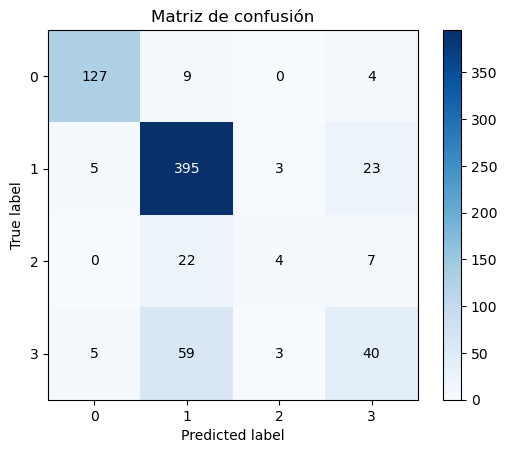

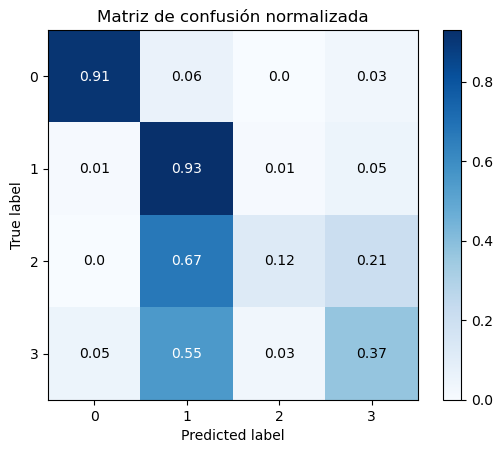

In [79]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

matriz_confusion=confusion_matrix(test_Y,y_pred_FT_SGD_50)
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_FT_SGD_50, normalize=False, title= 'Matriz de confusión')
skplt.metrics.plot_confusion_matrix(test_Y, y_pred_FT_SGD_50, normalize=True, title= 'Matriz de confusión normalizada')

# 4. Utilizamos SVM

In [99]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [100]:
flat_train_X=[] #input array 
#flat_train_Y=[]
flat_test_X=[]
#flat_test_Y=[]


for i in train_X:
    flat_train_X.append(i.flatten()) 

svm_train_X=np.array(flat_train_X) 
print(svm_train_X)
print(svm_train_X.size)
     
for i in test_X:
    flat_test_X.append(i.flatten()) 
    
svm_test_X=np.array(flat_test_X) 
print(svm_test_X)
print(svm_test_X.size)


[[0.49019608 0.49019608 0.49019608 ... 0.4745098  0.4745098  0.4745098 ]
 [0.21568628 0.21568628 0.21568628 ... 0.19215687 0.19215687 0.19215687]
 [0.827451   0.827451   0.827451   ... 0.14509805 0.14509805 0.14509805]
 ...
 [0.32941177 0.32941177 0.32941177 ... 0.6        0.6        0.6       ]
 [0.2509804  0.2509804  0.2509804  ... 0.41960785 0.41960785 0.41960785]
 [0.16470589 0.16470589 0.16470589 ... 0.38431373 0.38431373 0.38431373]]
424940544
[[0.33333334 0.33333334 0.33333334 ... 0.40392157 0.40392157 0.40392157]
 [0.41960785 0.41960785 0.41960785 ... 0.627451   0.627451   0.627451  ]
 [0.42745098 0.42745098 0.42745098 ... 0.37254903 0.37254903 0.37254903]
 ...
 [0.60784316 0.60784316 0.60784316 ... 0.4862745  0.4862745  0.4862745 ]
 [0.28235295 0.28235295 0.28235295 ... 0.42352942 0.42352942 0.42352942]
 [0.72156864 0.72156864 0.72156864 ... 0.63529414 0.63529414 0.63529414]]
106272768


In [93]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(flat_data, y, train_size=0.80, test_size=0.20)

In [118]:
import time
inicio = time.time()
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1,probability=True).fit(svm_train_X, train_Y)
fin = time.time()
print(fin-inicio)

10168.09583735466


In [119]:
import time
inicio = time.time()
rbf_pred = rbf.predict(svm_test_X)
fin = time.time()
print(fin-inicio)

1014.1820478439331


In [120]:
rbf_accuracy = accuracy_score(test_Y, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', rbf_accuracy)
print('F1 (RBF Kernel): ', rbf_f1)

Accuracy (RBF Kernel):  0.603399433427762
F1 (RBF Kernel):  0.46805824760200787


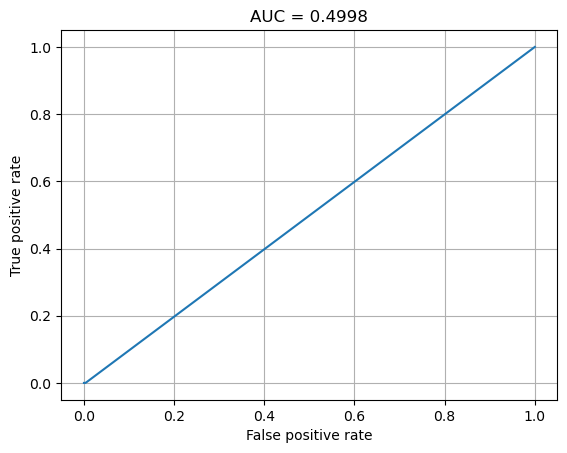

In [122]:
from sklearn import preprocessing

# Ploteamos la curva ROC
y_proba_test = rbf.predict_proba(svm_test_X) # "predict_proba" para extraer probabilidades vez de predicciones

y_test_bin = preprocessing.label_binarize(test_Y, classes=[0,1,2,3]) # Usar "label_binarize" en el caso de problemas multiclase

auc = metrics.roc_auc_score(test_Y, y_proba_test, multi_class='ovr') # Area Under the ROC curve (AUC)

fpr, tpr, th = metrics.roc_curve(y_test_bin[:,0], y_proba_test[:,0])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()